In [1]:
# Loading all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# Reading Titanic dataset directly from online source
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Previewing the first few entries
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking data types and missing values
titanic_data.info()

# Displaying count of missing entries in each column
titanic_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
# Replacing missing 'Age' values with the average age
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# Filling missing 'Embarked' entries with the most frequent port
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Dropping 'Cabin' as most of its entries are missing
titanic_data.drop('Cabin', axis=1, inplace=True)

# Verifying that missing values are handled
titanic_data.isnull().sum()


/tmp/ipython-input-4-2079586570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
/tmp/ipython-input-4-2079586570.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# Converting categorical columns to numerical using dummy variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Removing columns that are not useful for analysis
titanic_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

titanic_data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [6]:
# Initializing the scaler
scale = StandardScaler()

# Columns to be standardized
columns_to_scale = ['Age', 'Fare', 'SibSp', 'Parch']

# Applying standardization
titanic_data[columns_to_scale] = scale.fit_transform(titanic_data[columns_to_scale])

titanic_data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.592481,0.432793,-0.473674,-0.502445,True,False,True
1,1,1,0.638789,0.432793,-0.473674,0.786845,False,False,False
2,1,3,-0.284663,-0.474545,-0.473674,-0.488854,False,False,True
3,1,1,0.407926,0.432793,-0.473674,0.420730,False,False,True
4,0,3,0.407926,-0.474545,-0.473674,-0.486337,True,False,True


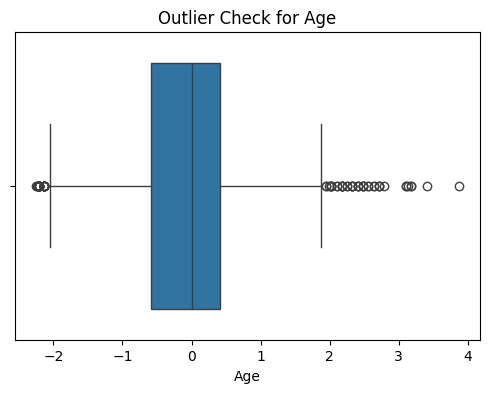

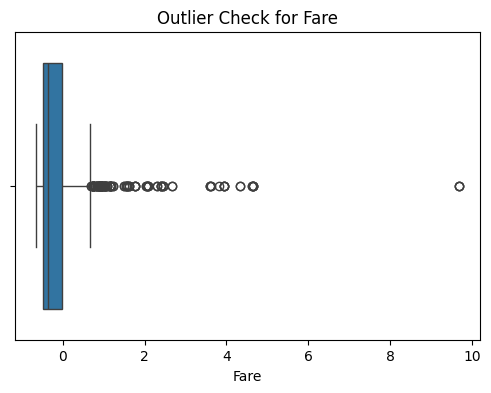

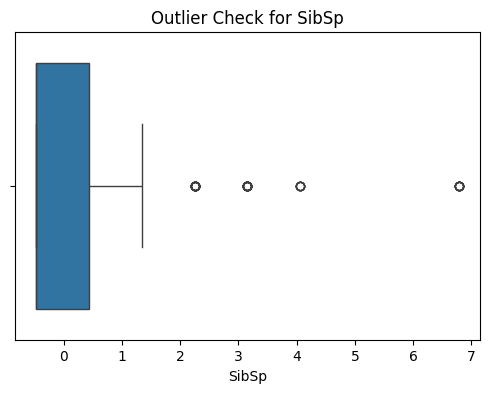

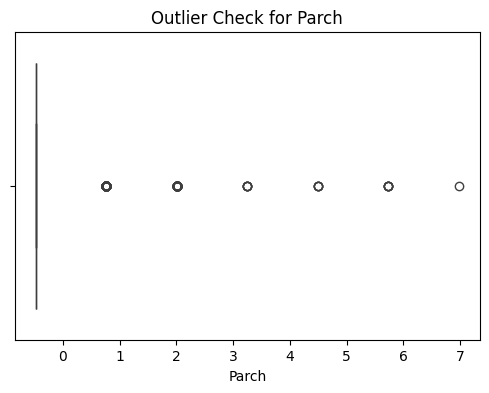

In [7]:
# Visualizing outliers using boxplots
for feature in columns_to_scale:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=titanic_data, x=feature)
    plt.title(f'Outlier Check for {feature}')
    plt.show()


In [8]:
# Calculating IQR boundaries for Fare
Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

titanic_data = titanic_data[(titanic_data['Fare'] >= lower_limit) & (titanic_data['Fare'] <= upper_limit)]

titanic_data.shape


(775, 9)

In [9]:
from google.colab import files

# Exporting cleaned dataset
titanic_data.to_csv('final_titanic_cleaned.csv', index=False)

# Allowing download
files.download('final_titanic_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>